In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## PREPROCESSING

In [2]:
train = pd.read_excel("train.xlsx")
test = pd.read_excel("test.xlsx")
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [6]:
train.drop_duplicates(inplace = True)
train.reset_index(drop = True, inplace = True)

In [7]:
train["Experience"] = train.Experience.apply(lambda x : ''.join(x.split(' ')[:1]))
train['Experience'] = pd.to_numeric(train['Experience'])

test["Experience"] = test.Experience.apply(lambda x : ''.join(x.split(' ')[:1]))
test['Experience'] = pd.to_numeric(test['Experience'])

In [8]:
train["Rating"] = train.Rating.apply(lambda x: ''.join(str(x).split('%')[:1]) if pd.notnull(x) else x)
train['Rating'] = pd.to_numeric(train['Rating'], errors = 'coerce')
train['Rating'] = train['Rating'].fillna(0)
train['Rating'] = train['Rating'].astype('int64')

test["Rating"] = test.Rating.apply(lambda x: ''.join(str(x).split('%')[:1]) if pd.notnull(x) else x)
test['Rating'] = pd.to_numeric(test['Rating'], errors = 'coerce')
test['Rating'] = test['Rating'].fillna(0)
test['Rating'] = test['Rating'].astype('int64')

In [9]:
train['Place'].fillna('missing', inplace=True)
train["Area"] = train.Place.apply(lambda x: ''.join(str(x).split(',')[:1]) if pd.notnull(x) else x)
train["City"] = train.Place.apply(lambda x: ''.join(str(x).split(',')[1:]) if pd.notnull(x) else x)
train["City"] = train.City.apply(lambda x: ''.join(str(x).split(' ')[1:]) if pd.notnull(x) else x)

test['Place'].fillna('missing', inplace = True)
test["Area"] = test.Place.apply(lambda x: ''.join(str(x).split(',')[:1]) if pd.notnull(x) else x)
test["City"] = test.Place.apply(lambda x: ''.join(str(x).split(',')[1:]) if pd.notnull(x) else x)
test["City"] = test.City.apply(lambda x: ''.join(str(x).split(' ')[1:]) if pd.notnull(x) else x)

In [10]:
train['Miscellaneous_Info'].fillna('missing', inplace = True)
train["Feedbacks"] = train.Miscellaneous_Info.apply(lambda x: ''.join(str(x).split('%')[1:]) if pd.notnull(x) else x)
train["Feedbacks"] = train.Feedbacks.apply(lambda x: ''.join(str(x).split('F')[:1]) if pd.notnull(x) else x)
train["Feedbacks"] = train.Feedbacks.apply(lambda x: ''.join(str(x).split(' ')[1:]) if pd.notnull(x) else x)
train.loc[train['Feedbacks'] == '', 'Feedbacks'] = '0'
train['Feedbacks'] = pd.to_numeric(train['Feedbacks'], errors = 'coerce')
train['Feedbacks'].fillna(0, inplace = True)
train['Feedbacks'] = train['Feedbacks'].astype('int64')

test['Miscellaneous_Info'].fillna('missing', inplace = True)
test["Feedbacks"] = test.Miscellaneous_Info.apply(lambda x: ''.join(str(x).split('%')[1:]) if pd.notnull(x) else x)
test["Feedbacks"] = test.Feedbacks.apply(lambda x: ''.join(str(x).split('F')[:1]) if pd.notnull(x) else x)
test["Feedbacks"] = test.Feedbacks.apply(lambda x: ''.join(str(x).split(' ')[1:]) if pd.notnull(x) else x)
test.loc[test['Feedbacks'] == '', 'Feedbacks'] = '0'
test['Feedbacks'] = pd.to_numeric(test['Feedbacks'], errors = 'coerce')
test['Feedbacks'].fillna(0, inplace = True)
test['Feedbacks'] = test['Feedbacks'].astype('int64')

In [11]:
train["Misc_Fees"] = train.Miscellaneous_Info.apply(lambda x: ''.join(str(x).split('₹')[1:]) if pd.notnull(x) else x)
train['Misc_Fees'] = train['Misc_Fees'].str.replace(',', '')
train["Misc_Fees"] = train.Misc_Fees.apply(lambda x: ''.join(str(x).split(' ')[:1]) if pd.notnull(x) else x)
train.loc[train['Misc_Fees'] == '', 'Misc_Fees'] = '0'
train['Misc_Fees'] = pd.to_numeric(train['Misc_Fees'], errors = 'coerce')
train['Misc_Fees'].fillna(0, inplace = True)
train['Misc_Fees'] = train['Misc_Fees'].astype('int64')

test["Misc_Fees"] = test.Miscellaneous_Info.apply(lambda x: ''.join(str(x).split('₹')[1:]) if pd.notnull(x) else x)
test['Misc_Fees'] = test['Misc_Fees'].str.replace(',', '')
test["Misc_Fees"] = test.Misc_Fees.apply(lambda x: ''.join(str(x).split(' ')[:1]) if pd.notnull(x) else x)
test.loc[test['Misc_Fees'] == '', 'Misc_Fees'] = '0'
test['Misc_Fees'] = pd.to_numeric(test['Misc_Fees'], errors = 'coerce')
test['Misc_Fees'].fillna(0, inplace = True)
test['Misc_Fees'] = test['Misc_Fees'].astype('int64')

In [12]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,Feedbacks,Misc_Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,16,0
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,76,0
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,missing,300,Mathikere - BEL,Bangalore,0,0
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,4,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5921 non-null   object
 1   Experience          5921 non-null   int64 
 2   Rating              5921 non-null   int64 
 3   Place               5921 non-null   object
 4   Profile             5921 non-null   object
 5   Miscellaneous_Info  5921 non-null   object
 6   Fees                5921 non-null   int64 
 7   Area                5921 non-null   object
 8   City                5921 non-null   object
 9   Feedbacks           5921 non-null   int64 
 10  Misc_Fees           5921 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 509.0+ KB


<AxesSubplot:>

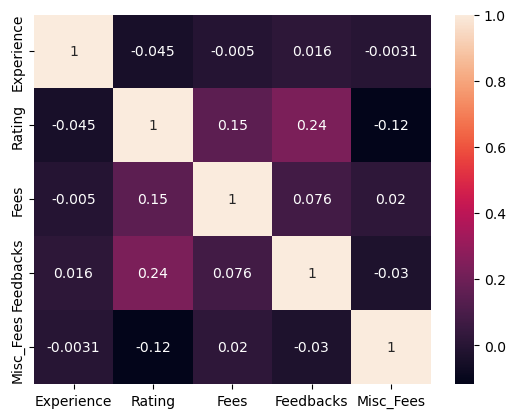

In [14]:
corr = train.corr()
sns.heatmap(corr, annot = True)

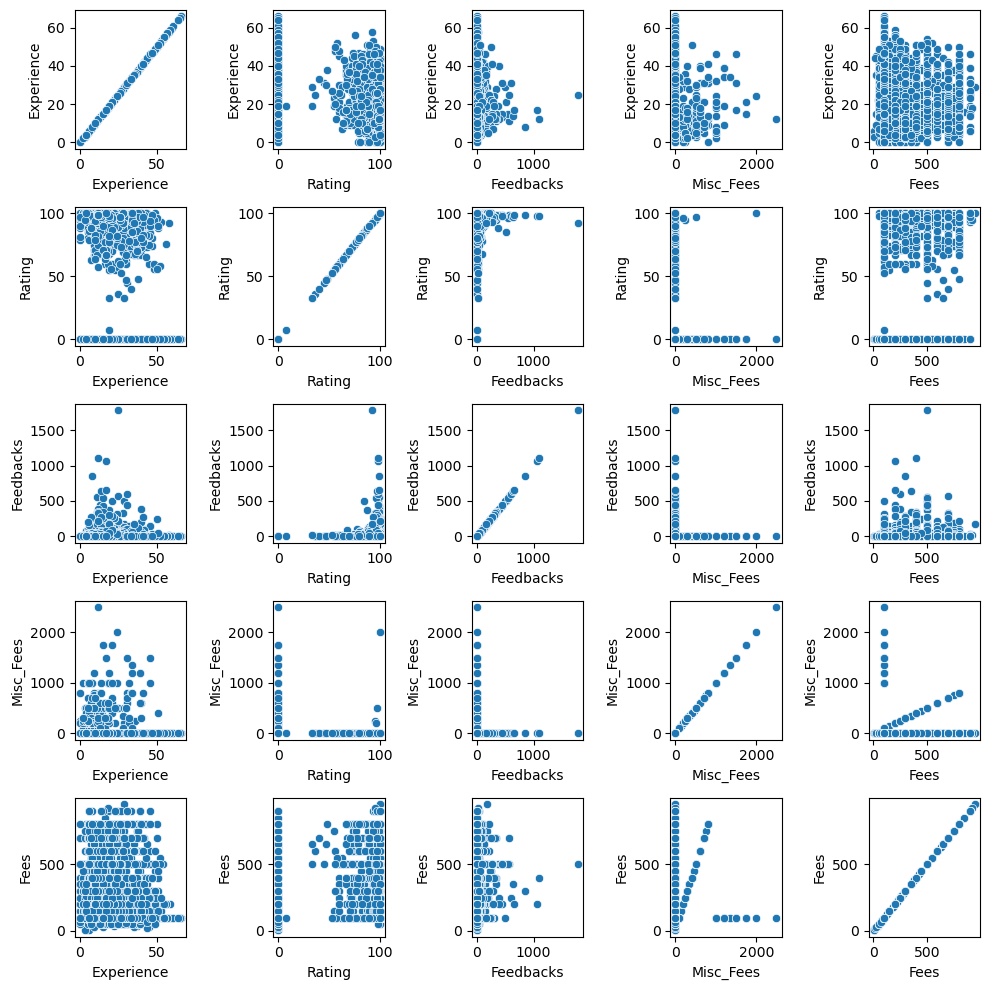

In [15]:
numericals = train[['Experience', 'Rating', 'Feedbacks', 'Misc_Fees', 'Fees']]
fig, axes = plt.subplots(5, 5, figsize = (10, 10))
axes = axes.flatten()
k = 0
j = 0
for i, ax in enumerate(axes):
    x = numericals.iloc[:, k]
    y = numericals.iloc[:, j]
    sns.scatterplot(x = x, y = y, ax = ax)
    k = k + 1
    if k == 5:
        k = 0
        j = j + 1
plt.tight_layout()
plt.show()

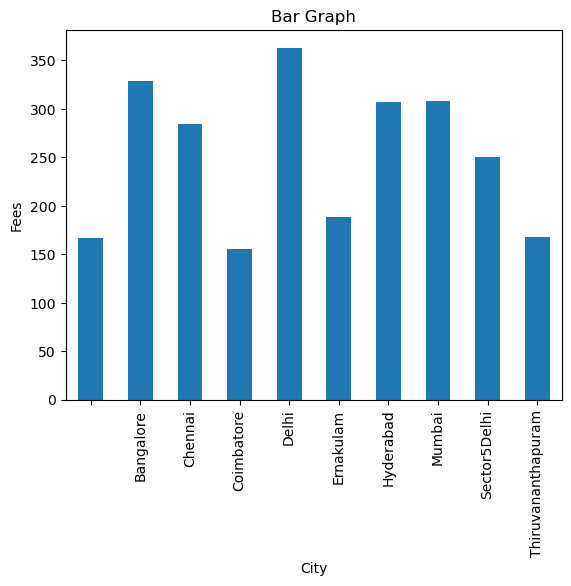

In [16]:
city_agg = train.groupby('City')['Fees'].mean()
city_agg.plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('Fees')
plt.title('Bar Graph')
plt.show()

# WINSORIZING OUTLIERS

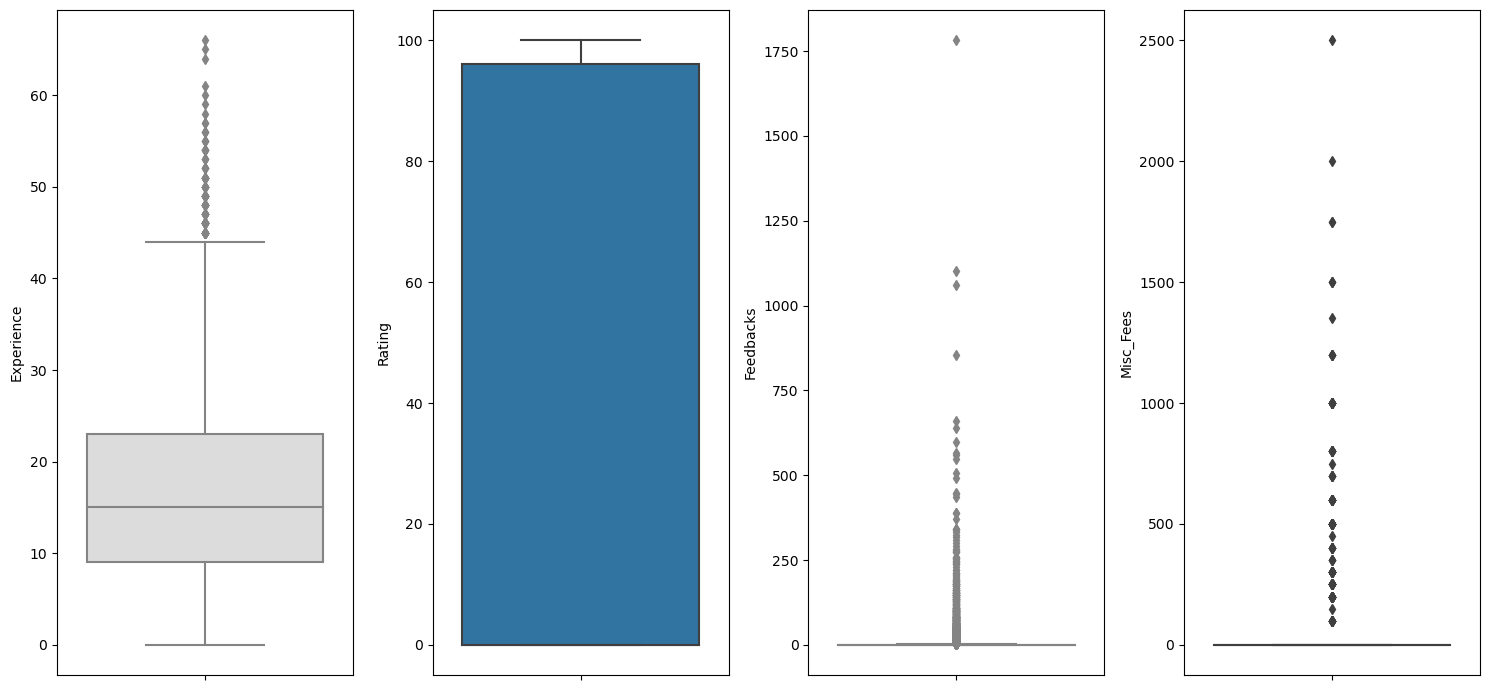

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,7)
f,(ax1, ax2, ax3, ax4) = plt.subplots(1,4)
sns.boxplot(y = 'Experience', data = train, ax = ax1, palette = 'coolwarm')
sns.boxplot(y = 'Rating', data = train, ax = ax2)
sns.boxplot(y = 'Feedbacks', data = train, ax = ax3, palette = 'coolwarm')
sns.boxplot(y = 'Misc_Fees', data = train, ax = ax4)
f.tight_layout()

In [18]:
for column in ['Experience', 'Feedbacks', 'Misc_Fees']:
    IQR = train[column].quantile(0.75) - train[column].quantile(0.25)
    Lower_fence = train[column].quantile(0.25) - (IQR * 1.5)
    Upper_fence = train[column].quantile(0.75) + (IQR * 1.5)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Experience outliers are values < -12.0 or > 44.0
Feedbacks outliers are values < -1.5 or > 2.5
Misc_Fees outliers are values < 0.0 or > 0.0


In [19]:
train_copy = train.copy()
train_copy['Experience'] = np.where(train['Experience'] > 44.0, 44.0, train['Experience'])
train_copy['Feedbacks'] = np.where(train['Feedbacks'] > 2.5, 2.5, train['Feedbacks'])
train_copy['Misc_Fees'] = np.where(train['Misc_Fees'] > 0, 0, train['Misc_Fees'])

## DUMMIFICATION

In [20]:
X1 = pd.get_dummies(train[['Profile', 'City']], drop_first = True)

X2 = pd.get_dummies(test[['Profile', 'City']], drop_first = True)
X2 = pd.concat([test[['Experience', 'Rating', 'Misc_Fees', 'Feedbacks']], X2], axis = 1)

## DECISION TREE REGRESSOR

In [21]:
X = pd.concat([train_copy[['Experience', 'Rating', 'Misc_Fees', 'Feedbacks']], X1], axis = 1)

from sklearn.tree import DecisionTreeRegressor

X_train, X_val, y_train, y_val = train_test_split(X, train_copy['Fees'], test_size = 0.1, random_state = 5)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train + 1) - np.log10(y_train + 1)).mean())
y_pred_val = model.predict(X_val)
result_val = 1 - np.sqrt(np.square(np.log10(y_pred_val + 1) - np.log10(y_val + 1)).mean())
print("Train Result:", result_train)
print("Test Result:", result_val)

Train Result: 0.817759470674447
Test Result: 0.6733817586525915


## XGB REGRESSOR

In [22]:
X = pd.concat([train[['Experience', 'Rating', 'Misc_Fees', 'Feedbacks']], X1], axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, train['Fees'], test_size = 0.1, random_state = 5)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train + 1) - np.log10(y_train + 1)).mean())
y_pred_val = model.predict(X_val)
result_val = 1 - np.sqrt(np.square(np.log10(y_pred_val + 1) - np.log10(y_val + 1)).mean())
print("Train Result:", result_train)
print("Test Result:", result_val)

Train Result: 0.777327296670638
Test Result: 0.7354534896755205


## RFECV

In [23]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = model, step = 1, cv = 10, scoring = 'neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X_train.columns[rfecv.support_])

The optimal number of features: 10
Best features: Index(['Misc_Fees', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath', 'City_Coimbatore', 'City_Delhi', 'City_Ernakulam',
       'City_Thiruvananthapuram'],
      dtype='object')


In [24]:
X_train_selected = rfecv.transform(X_train)
X_val_selected = rfecv.transform(X_val)

model = XGBRegressor()
model.fit(X_train_selected, y_train)
y_pred_train = model.predict(X_train_selected)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train + 1) - np.log10(y_train + 1)).mean())
y_pred_val = model.predict(X_val_selected)
result_val = 1 - np.sqrt(np.square(np.log10(y_pred_val + 1) - np.log10(y_val + 1)).mean())
print("Train Result:", result_train)
print("Test Result:", result_val)

Train Result: 0.7196853779756704
Test Result: 0.731466758425564


## APPLYING OPTUNA ON XGB

In [25]:
import optuna

def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    
    model = XGBRegressor(**param_space)
    model.fit(X_train_selected, y_train)
    y_pred_val = model.predict(X_val_selected)
    result_val = 1 - np.sqrt(np.square(np.log10(y_pred_val + 1) - np.log10(y_val + 1)).mean())
    return result_val

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 30, show_progress_bar = True)

[I 2023-07-05 04:53:01,576] A new study created in memory with name: no-name-bd54bbe6-9882-4ef7-834a-f0deb3cd8783


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2023-07-05 04:53:06,713] Trial 0 finished with value: 0.7392807052350543 and parameters: {'n_estimators': 789, 'max_depth': 10, 'learning_rate': 0.01248558100373202, 'subsample': 0.7555872511550114, 'colsample_bytree': 0.6453494875293282, 'reg_alpha': 0.7290836422551287, 'reg_lambda': 0.8085470373310892, 'min_child_weight': 10}. Best is trial 0 with value: 0.7392807052350543.
[I 2023-07-05 04:53:09,422] Trial 1 finished with value: 0.5460656909051484 and parameters: {'n_estimators': 171, 'max_depth': 15, 'learning_rate': 0.0027824734922267157, 'subsample': 0.7356079881062401, 'colsample_bytree': 0.8371436511314592, 'reg_alpha': 0.8525104319512578, 'reg_lambda': 0.10833977196683642, 'min_child_weight': 2}. Best is trial 0 with value: 0.7392807052350543.
[I 2023-07-05 04:53:10,972] Trial 2 finished with value: 0.737478344756306 and parameters: {'n_estimators': 558, 'max_depth': 3, 'learning_rate': 0.0736579783997472, 'subsample': 0.8612377133060556, 'colsample_bytree': 0.7468047469037

C:\Users\jadha\AppData\Local\Temp\ipykernel_13128\133117279.py:18: RuntimeWarning: invalid value encountered in log10
  result_val = 1 - np.sqrt(np.square(np.log10(y_pred_val + 1) - np.log10(y_val + 1)).mean())


[I 2023-07-05 04:53:13,891] Trial 3 finished with value: 0.7398585260930013 and parameters: {'n_estimators': 781, 'max_depth': 4, 'learning_rate': 0.08574003984150648, 'subsample': 0.8526400372892322, 'colsample_bytree': 0.9541531109583703, 'reg_alpha': 0.27082570632948477, 'reg_lambda': 0.3529923098662069, 'min_child_weight': 7}. Best is trial 3 with value: 0.7398585260930013.
[I 2023-07-05 04:53:16,350] Trial 4 finished with value: 0.741390315709963 and parameters: {'n_estimators': 440, 'max_depth': 6, 'learning_rate': 0.03575689091793079, 'subsample': 0.7130063466667121, 'colsample_bytree': 0.9250529770297224, 'reg_alpha': 0.33109820541173274, 'reg_lambda': 0.5993532940011024, 'min_child_weight': 4}. Best is trial 4 with value: 0.741390315709963.
[I 2023-07-05 04:53:20,384] Trial 5 finished with value: 0.7351015490155259 and parameters: {'n_estimators': 719, 'max_depth': 7, 'learning_rate': 0.04753735258419131, 'subsample': 0.8397819902351588, 'colsample_bytree': 0.8505325451655463,

[I 2023-07-05 04:54:39,419] Trial 25 finished with value: 0.7396946739791939 and parameters: {'n_estimators': 482, 'max_depth': 4, 'learning_rate': 0.034804697280687635, 'subsample': 0.8044380893506321, 'colsample_bytree': 0.9007415811519357, 'reg_alpha': 0.3261467757286108, 'reg_lambda': 0.5203107435570085, 'min_child_weight': 4}. Best is trial 4 with value: 0.741390315709963.
[I 2023-07-05 04:54:41,277] Trial 26 finished with value: 0.7398396405821908 and parameters: {'n_estimators': 470, 'max_depth': 4, 'learning_rate': 0.04791278248867881, 'subsample': 0.8002905613259944, 'colsample_bytree': 0.9590362896896919, 'reg_alpha': 0.31111431468243445, 'reg_lambda': 0.5244954142729423, 'min_child_weight': 4}. Best is trial 4 with value: 0.741390315709963.
[I 2023-07-05 04:54:42,746] Trial 27 finished with value: 0.740216132507509 and parameters: {'n_estimators': 336, 'max_depth': 4, 'learning_rate': 0.047355749013045734, 'subsample': 0.8295317361422914, 'colsample_bytree': 0.95853195777942

In [26]:
# param = {
#     'n_estimators': 480,
#     'max_depth': 7,
#     'learning_rate': 0.004243339228569672,
#     'subsample': 0.5679244051617394,
#     'colsample_bytree': 0.7363150397280657,
#     'reg_alpha': 0.23664881522531372,
#     'reg_lambda': 0.8713651760741751,
#     'min_child_weight': 5
# }

model = XGBRegressor(**study.best_trial.params)
model.fit(X_train_selected, y_train)
y_pred_train = model.predict(X_train_selected)
result_train = 1 - np.sqrt(np.square(np.log10(y_pred_train + 1) - np.log10(y_train + 1)).mean())
y_pred_val = model.predict(X_val_selected)
result_val = 1 - np.sqrt(np.square(np.log10(y_pred_val + 1) - np.log10(y_val + 1)).mean())
print("Train Result:", result_train)
print("Test Result:", result_val)

Train Result: 0.7599037454871741
Test Result: 0.7416901991700491


## SUBMISSION

In [27]:
X1.columns

Index(['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath', 'City_Bangalore',
       'City_Chennai', 'City_Coimbatore', 'City_Delhi', 'City_Ernakulam',
       'City_Hyderabad', 'City_Mumbai', 'City_Sector5Delhi',
       'City_Thiruvananthapuram'],
      dtype='object')

In [28]:
X2.columns

Index(['Experience', 'Rating', 'Misc_Fees', 'Feedbacks', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath', 'City_Bangalore',
       'City_Chennai', 'City_Coimbatore', 'City_Delhi', 'City_Ernakulam',
       'City_Hyderabad', 'City_Mumbai', 'City_Thiruvananthapuram'],
      dtype='object')

In [29]:
# Adding the feature 'City_Sector5Delhi' into the test set as it exists in the train set but not the test set
X2['City_Sector5Delhi'] = 0
column = X2.pop('City_Sector5Delhi')
X2.insert(16, 'City_Sector5Delhi', column)

In [30]:
X2_selected = rfecv.transform(X2)

test['Fees'] = model.predict(X2_selected)
test['Fees'].to_excel('submission.xlsx', index = False)

In [ ]:
# MACHINEHACK SCORE - 0.73845
# RANK - 37
# RANK 1 SCORE - 0.76162